<a href="https://colab.research.google.com/github/francis-100/algorithms_design/blob/main/DAA_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

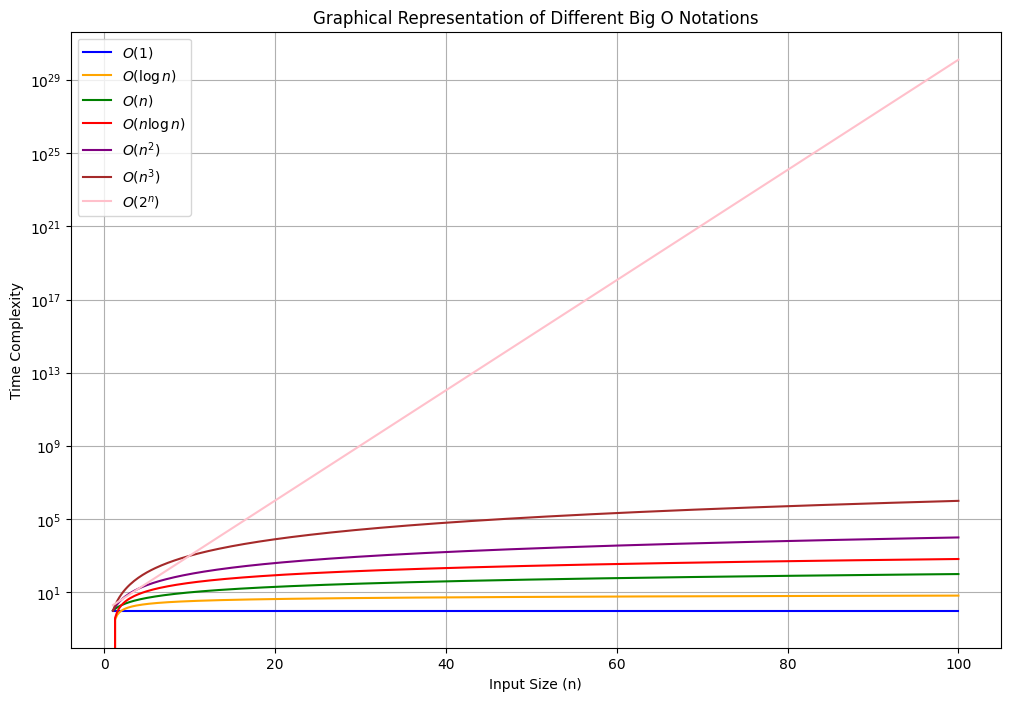

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of input sizes
n = np.linspace(1, 100, 400)
n_large = np.linspace(1, 100, 400)

# Define the Big O functions
O_1 = np.ones_like(n)
O_log_n = np.log2(n)
O_n = n
O_n_log_n = n * np.log2(n)
O_n_squared = n ** 2
O_n_cubed = n ** 3
O_2_n = 2 ** n_large

# Create the plot
plt.figure(figsize=(12, 8))

plt.plot(n, O_1, label='$O(1)$', color='blue')
plt.plot(n, O_log_n, label='$O(\log n)$', color='orange')
plt.plot(n, O_n, label='$O(n)$', color='green')
plt.plot(n, O_n_log_n, label='$O(n \log n)$', color='red')
plt.plot(n, O_n_squared, label='$O(n^2)$', color='purple')
plt.plot(n, O_n_cubed, label='$O(n^3)$', color='brown')
plt.plot(n_large, O_2_n, label='$O(2^n)$', color='pink')

# Adding a legend to the plot
plt.legend()

# Labeling the axes
plt.yscale('log')  # Using a logarithmic scale to better visualize the differences
plt.xlabel('Input Size (n)')
plt.ylabel('Time Complexity')

# Title of the plot
plt.title('Graphical Representation of Different Big O Notations')

# Show the plot
plt.grid(True)
plt.show()

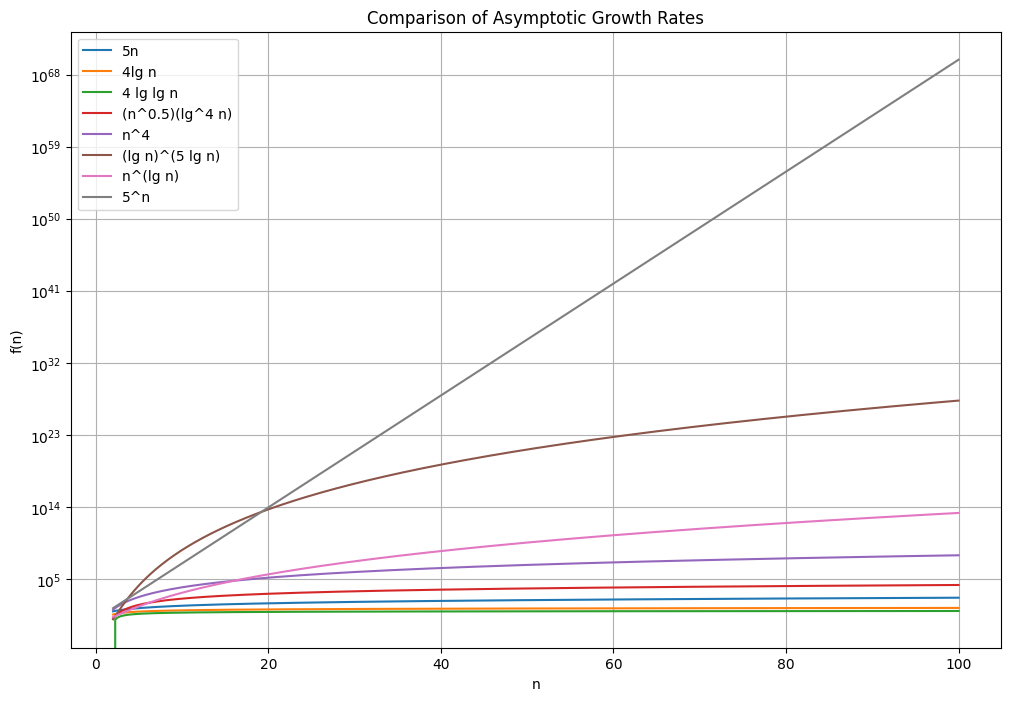

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of n values, starting from 2 to avoid log2 issues
n = np.linspace(2, 100, 400)

# Define the functions
f1 = 5 * n
f2 = 4 * np.log2(n)
f3 = 4 * np.log2(np.log2(n))
f4 = n**4
f5 = (np.sqrt(n) * (np.log2(n)**4))
f6 = (np.log2(n)**(5 * np.log2(n)))
f7 = n**(np.log2(n))
f8 = 5**n

# Plot the functions
plt.figure(figsize=(12, 8))

plt.plot(n, f1, label='5n')
plt.plot(n, f2, label='4lg n')
plt.plot(n, f3, label='4 lg lg n')
plt.plot(n, f5, label='(n^0.5)(lg^4 n)')
plt.plot(n, f4, label='n^4')
plt.plot(n, f6, label='(lg n)^(5 lg n)')
plt.plot(n, f7, label='n^(lg n)')
plt.plot(n, f8, label='5^n')

# Set the y-axis to log scale to better visualize differences
plt.yscale('log')

# Add labels and legend
plt.xlabel('n')
plt.ylabel('f(n)')
plt.title('Comparison of Asymptotic Growth Rates')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def min_refuel_stops(D, max_distance):
    n = len(D)
    stops = 0
    current_position = 0
    current_fuel = max_distance

    print(f"Starting journey with max distance per tank: {max_distance}")

    while current_position < n - 1:
        print(f"Current position: {current_position} (distance: {D[current_position]}), "
              f"current fuel: {current_fuel}, stops so far: {stops}")

        # Find the farthest station we can reach with the current fuel
        next_position = -1
        for i in range(current_position + 1, n):
            if D[i] - D[current_position] <= current_fuel:
                next_position = i
            else:
                break

        # If we didn't find a reachable station, it means we can't proceed
        if next_position == -1:
            print(f"Cannot reach any further station from position {current_position} with current fuel {current_fuel}")
            return float('inf')

        # Print debug information
        print(f"Refueling at station {next_position} (distance: {D[next_position]}), "
              f"distance traveled: {D[next_position] - D[current_position]}, "
              f"fuel remaining: {current_fuel - (D[next_position] - D[current_position])}, stops: {stops + 1}")

        # Move to the farthest reachable station and refuel
        current_fuel -= (D[next_position] - D[current_position])
        current_fuel = max_distance  # Refuel to full tank
        current_position = next_position
        stops += 1

    return stops

# Example usage:
D = [0,50, 200, 300, 350, 450,500, 600]  # Distances of fuel stations including start (Nairobi) and end (destination)
max_distance = 200

result = min_refuel_stops(D, max_distance)
print(f"Minimum refueling stops required: {result}")  # Expected output: 3

Starting journey with max distance per tank: 200
Current position: 0 (distance: 0), current fuel: 200, stops so far: 0
Refueling at station 2 (distance: 200), distance traveled: 200, fuel remaining: 0, stops: 1
Current position: 2 (distance: 200), current fuel: 200, stops so far: 1
Refueling at station 4 (distance: 350), distance traveled: 150, fuel remaining: 50, stops: 2
Current position: 4 (distance: 350), current fuel: 200, stops so far: 2
Refueling at station 6 (distance: 500), distance traveled: 150, fuel remaining: 50, stops: 3
Current position: 6 (distance: 500), current fuel: 200, stops so far: 3
Refueling at station 7 (distance: 600), distance traveled: 100, fuel remaining: 100, stops: 4
Minimum refueling stops required: 4


In [ ]:
from collections import defaultdict

def find_town_chief(n, trust):
    # Construct the directed graph
    graph = defaultdict(list)
    in_degree = [0] * (n + 1)
    out_degree = [0] * (n + 1)

    for a, b in trust:
        graph[a].append(b)
        out_degree[a] += 1
        in_degree[b] += 1

    # Identify the town chief
    town_chief = -1
    for i in range(1, n + 1):
        if in_degree[i] == n - 1 and out_degree[i] == 0:
            town_chief = i
            break

    return town_chief

#  usage:
n = 4
trust = [[1, 3], [1, 4], [2, 3], [2, 4], [4, 3]]
town_chief = find_town_chief(n, trust)
if town_chief != -1:
    print(f"The town chief is person {town_chief}")
else:
    print("There is no town chief in the town")

The town chief is person 3
